In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [19]:
dataset = pd.read_csv('apparel-trainval.csv')
# dataset

X = dataset.drop('label', axis = 1)
y = dataset['label']

In [20]:
#Standardization of data
X = (X - np.mean(X))/np.std(X)

from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20) 

Y_train=pd.concat([Y_train,pd.get_dummies(Y_train,prefix='label')],axis=1).drop(['label'],axis=1)

X_train = X_train.iloc[:]
Y_train = Y_train.iloc[:]

In [21]:
class Neural_network(object):
    def __init__(self,hlayer):
        self.input_layer_size = 784
        self.output_layer_size = 10
        self.hidden_layer_size = 70
        self.hidden_layers = hlayer
        self.weights = {}
        self.dweights = {}
        self.Z = {}
        self.a = {}
        self.Y_hat = np.array([])
        self.delta = {}
        
    def initialization(self):
        #Initialization of weights
        self.weights[1] = np.random.randn(self.input_layer_size,self.hidden_layer_size)*0.01
        self.weights[self.hidden_layers+1] = np.random.randn(self.hidden_layer_size,self.output_layer_size)*0.01
        for i in np.arange(2,self.hidden_layers+1):
            self.weights[i] = np.random.randn(self.hidden_layer_size,self.hidden_layer_size)*0.01

    
    def softmax(self,a):
        mx = np.sum(a,axis = 1,keepdims = True)
        ex = np.divide(a,mx)
        return ex
    
    def error(self,y):
#         y = self.y_prep(Y)
        return sum(0.5*np.sum((y-self.Y_hat)*(y-self.Y_hat),axis = 1))

    def sigmoid(self,x):                                        
        return 1 / (1 + np.exp(-x))
    
    def sigmoidDerivative(self,x):                                        
        return x*(1-x)
   
    def deltas(self,y):
#         y = self.y_prep(Y)
        #Delta value and dj_dw of last layer
        self.delta[self.hidden_layers+2] = -(y - self.Y_hat)*(self.sigmoidDerivative(self.a[self.hidden_layers+2]))
        self.dweights[self.hidden_layers+1] = np.dot(self.a[self.hidden_layers+1].T , (self.delta[self.hidden_layers+2]))
        #Dtheta and Dj_Dw for remaining layers
        
        for i in np.arange(self.hidden_layers+1,1,-1):
            self.delta[i] = ( np.dot(self.delta[i+1], self.weights[i].T))*(self.sigmoidDerivative(self.a[i]))
            self.dweights[i-1] = np.dot(self.a[i-1].T , (self.delta[i]))  
    

    def forward_propagation(self, X):
        #Initial a[1] is equal to weight matrix itself
        self.a[1] = np.array(X.T[0:self.input_layer_size].T)
        
        #upadting Z and a attributes for remaining layers
        for i in range(1,self.hidden_layers+2):
            self.Z[i+1] = np.dot(self.a[i],self.weights[i])
            self.a[i+1] = self.sigmoid(self.Z[i+1])
            #self.a[i+1] = self.tanh(self.Z[i+1])
        #copnverting 'a' attribute of last layer to softmax
        self.Y_hat = self.softmax(self.a[self.hidden_layers+2])
        
   #Gradient descent process: Do forward propagation, calculate error, calculate deltas and dj_dw, update weights
    def gradient_descent(self,X_train,Y_train,iterations,alpha):
        k = 0
        while k<=15000 :
            X = X_train[k : k+1000]
            Y = Y_train[k : k+1000]
            
            for i in range(iterations):
                self.forward_propagation(X)
#                 Y = self.y_prep(Y,k)
#                 print("Error : ",self.error(Y))
                self.deltas(Y)
                for j in range(1,self.hidden_layers+2):
                    self.weights[j] = self.weights[j] - alpha*self.dweights[j]
            k = k+1000
            print("Final Error : ",self.error(Y))
            print("Batch Done for",k)
        
    def predict(self,X_test):
        self.forward_propagation(X_test)
    
    def accuracy(self,Y):
        predicted = np.argmax(self.Y_hat,axis = 1)
        return 100*(accuracy_score(predicted,np.array(Y)))
            

In [22]:
numHiddenLayerList = []
accurList = []
for i in range(1,5) :    
   
    k = Neural_network(i)
    k.initialization()
    #k.forward_propagation(X_train)
    k.gradient_descent(X_train,Y_train,300,0.001)

    X_test1= X_test[:3000]
    Y_test2= Y_test[:3000]

    k.predict(X_test1)
    print("for Hidden Layer : ",i)
    numHiddenLayerList.append(i)
    accur = k.accuracy(Y_test2)
    accurList.append(100-accur)

Final Error :  134.28731408225923
Batch Done for 1000
Final Error :  76.99044487669295
Batch Done for 2000
Final Error :  75.54624089484822
Batch Done for 3000
Final Error :  58.974352832586554
Batch Done for 4000
Final Error :  54.21606240701868
Batch Done for 5000
Final Error :  60.91184644794506
Batch Done for 6000
Final Error :  67.93396471273498
Batch Done for 7000
Final Error :  53.16176101741273
Batch Done for 8000
Final Error :  62.47952777057181
Batch Done for 9000
Final Error :  78.87977023813559
Batch Done for 10000
Final Error :  75.26775295265838
Batch Done for 11000
Final Error :  69.87409881928792
Batch Done for 12000
Final Error :  65.85245283702989
Batch Done for 13000
Final Error :  57.38166339949824
Batch Done for 14000
Final Error :  67.65980800548401
Batch Done for 15000
Final Error :  84.13190427737138
Batch Done for 16000
for Hidden Layer :  1
Final Error :  411.9958032855866
Batch Done for 1000
Final Error :  379.04624113419703
Batch Done for 2000
Final Error : 

In [23]:
print(numHiddenLayerList)
print(accurList)

[1, 2, 3, 4]
[16.33333333333333, 30.266666666666666, 84.8, 89.56666666666666]


Text(0, 0.5, 'Prediction Loss(Error)')

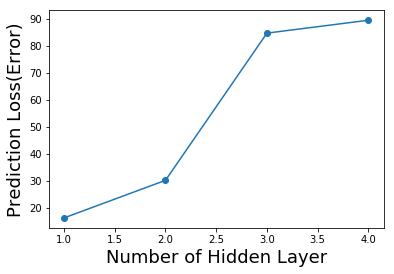

In [24]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(numHiddenLayerList, accurList,marker='o')
ax.set_xlabel("Number of Hidden Layer", fontsize=18)
ax.set_ylabel("Prediction Loss(Error)", fontsize=18)